# More on plotting
files needed = ('wdi.csv', 'broadband_size.xlsx', 'CPS_March_2016.csv')

### The seaborn package
We have been using matplotlib to plot. This is a very low-level package, meaning that we have a lot of fine-grained control of the elements of our plots. I like fine-grained control because it means I can makes things look exactly how I want it. It also means that we have to type a lot of code to create a figure. 

In this notebook we introduce the *seaborn* package. Seaborn is written on top of matplotlib and automates some of the creation of plots. This can be very helpful, but remember **do not trust the defaults.** 

Seaborn also includes some plot types that are not easy to do in matplotlib. Great!

Along the way, we will also dip into legend formatting and color palettes. Let's take a closer look at the *World Development Indicators*, too!


In [1]:
import pandas as pd                    # our go-to for data handling                  
import matplotlib.pyplot as plt        # make plots, but doesn't automate much
import seaborn as sns                  # some new plot types, more automation

pd.set_option('precision', 3)       # this tells pandas to print out 3 decimal places when we print a DataFrame

## World Development Indicators
The World Bank's [World Development Indicators](http://databank.worldbank.org/data/source/world-development-indicators) is a great source of economic and social data for many countries and many years. I have already downloaded output and consumption data for a few countries and saved it as 'wdi.csv'. 

The database is great: lots of variables, countries and time. The files that come out of the download facility are a mess. Let's clean them up.  

In [2]:
# Load the data. Note that the missing values are '..'.
wdi = pd.read_csv('wdi.csv', na_values='..')
wdi.head()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017]
0,United States,USA,GDP per capita (constant LCU),NY.GDP.PCAP.KN,17036.885,17142.194,17910.279,18431.158,1.923e+04,2.021e+04,...,4.936e+04,4.758e+04,4.838e+04,4.879e+04,4.950e+04,4.997e+04,5.087e+04,5.193e+04,5.232e+04,5.313e+04
1,United States,USA,Households and NPISHs Final consumption expend...,NE.CON.PRVT.KN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.017e+13,1.001e+13,1.020e+13,1.043e+13,1.059e+13,1.074e+13,1.105e+13,1.145e+13,1.176e+13,NaN
2,France,FRA,GDP per capita (constant LCU),NY.GDP.PCAP.KN,9808.991,10211.567,10740.123,11155.834,1.173e+04,1.215e+04,...,3.132e+04,3.024e+04,3.068e+04,3.117e+04,3.108e+04,3.110e+04,3.124e+04,3.144e+04,3.169e+04,3.214e+04
3,France,FRA,Households and NPISHs Final consumption expend...,NE.CON.PRVT.KN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.082e+12,1.085e+12,1.105e+12,1.110e+12,1.107e+12,1.113e+12,1.121e+12,1.137e+12,1.162e+12,1.175e+12
4,Japan,JPN,GDP per capita (constant LCU),NY.GDP.PCAP.KN,755579.063,824799.124,889947.223,955586.125,1.056e+06,1.106e+06,...,3.965e+06,3.750e+06,3.907e+06,3.910e+06,3.974e+06,4.060e+06,4.080e+06,4.140e+06,4.184e+06,4.262e+06


In [3]:
wdi.drop(['Country Code', 'Series Code'], axis=1, inplace=True)  # drop the redundant series
wdi.head()

,Country Name,Series Name,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],...,2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017]
0,United States,GDP per capita (constant LCU),17036.885,17142.194,17910.279,18431.158,1.923e+04,2.021e+04,2.127e+04,2.157e+04,...,4.936e+04,4.758e+04,4.838e+04,4.879e+04,4.950e+04,4.997e+04,5.087e+04,5.193e+04,5.232e+04,5.313e+04
1,United States,Households and NPISHs Final consumption expend...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.017e+13,1.001e+13,1.020e+13,1.043e+13,1.059e+13,1.074e+13,1.105e+13,1.145e+13,1.176e+13,NaN
2,France,GDP per capita (constant LCU),9808.991,10211.567,10740.123,11155.834,1.173e+04,1.215e+04,1.266e+04,1.315e+04,...,3.132e+04,3.024e+04,3.068e+04,3.117e+04,3.108e+04,3.110e+04,3.124e+04,3.144e+04,3.169e+04,3.214e+04
3,France,Households and NPISHs Final consumption expend...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.082e+12,1.085e+12,1.105e+12,1.110e+12,1.107e+12,1.113e+12,1.121e+12,1.137e+12,1.162e+12,1.175e+12
4,Japan,GDP per capita (constant LCU),755579.063,824799.124,889947.223,955586.125,1.056e+06,1.106e+06,1.212e+06,1.334e+06,...,3.965e+06,3.750e+06,3.907e+06,3.910e+06,3.974e+06,4.060e+06,4.080e+06,4.140e+06,4.184e+06,4.262e+06


In [4]:
# The data are wide. Clean up the columns that will eventually be the column names. 
wdi['Series Name'] = wdi['Series Name'].replace('GDP per capita (constant LCU)', 'real_gdp')
wdi['Series Name'] = wdi['Series Name'].replace(
    'Households and NPISHs Final consumption expenditure (constant LCU)', 'real_cons')
wdi


,Country Name,Series Name,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],...,2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017]
0,United States,real_gdp,1.704e+04,1.714e+04,1.791e+04,1.843e+04,1.923e+04,2.021e+04,2.127e+04,2.157e+04,...,4.936e+04,4.758e+04,4.838e+04,4.879e+04,4.950e+04,4.997e+04,5.087e+04,5.193e+04,5.232e+04,5.313e+04
1,United States,real_cons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.017e+13,1.001e+13,1.020e+13,1.043e+13,1.059e+13,1.074e+13,1.105e+13,1.145e+13,1.176e+13,NaN
2,France,real_gdp,9.809e+03,1.021e+04,1.074e+04,1.116e+04,1.173e+04,1.215e+04,1.266e+04,1.315e+04,...,3.132e+04,3.024e+04,3.068e+04,3.117e+04,3.108e+04,3.110e+04,3.124e+04,3.144e+04,3.169e+04,3.214e+04
3,France,real_cons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.082e+12,1.085e+12,1.105e+12,1.110e+12,1.107e+12,1.113e+12,1.121e+12,1.137e+12,1.162e+12,1.175e+12
4,Japan,real_gdp,7.556e+05,8.248e+05,8.899e+05,9.556e+05,1.056e+06,1.106e+06,1.212e+06,1.334e+06,...,3.965e+06,3.750e+06,3.907e+06,3.910e+06,3.974e+06,4.060e+06,4.080e+06,4.140e+06,4.184e+06,4.262e+06
5,Japan,real_cons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.842e+14,2.822e+14,2.890e+14,2.878e+14,2.937e+14,3.006e+14,2.981e+14,2.980e+14,2.981e+14,NaN
6,Chile,real_gdp,2.066e+06,2.126e+06,2.163e+06,2.239e+06,2.247e+06,2.219e+06,2.415e+06,2.450e+06,...,6.831e+06,6.657e+06,6.978e+06,7.335e+06,7.656e+06,7.895e+06,7.966e+06,8.081e+06,8.116e+06,8.171e+06
7,Chile,real_cons,1.039e+13,1.098e+13,1.143e+13,1.191e+13,1.184e+13,1.183e+13,1.316e+13,1.361e+13,...,6.559e+13,6.503e+13,7.198e+13,7.788e+13,8.260e+13,8.638e+13,8.868e+13,9.057e+13,9.259e+13,9.485e+13
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Didn't see the footer --- again. I am just going to drop the rows I don't need, which are all the rows after row 7. 
# This is not a very robust method. A better one would be to drop the rows that have missing 'Series Name'.
wdi = wdi.loc[0:7]

# Then set the index to name and series. These will become the column names. 
wdi.set_index(['Country Name', 'Series Name'], inplace=True)

# Swap the rows for columns
wdi = wdi.transpose()

wdi.head()

Country Name  United States               France                Japan  \
Series Name        real_gdp real_cons   real_gdp real_cons   real_gdp   
1960 [YR1960]     17036.885       NaN   9808.991       NaN  7.556e+05   
1961 [YR1961]     17142.194       NaN  10211.567       NaN  8.248e+05   
1962 [YR1962]     17910.279       NaN  10740.123       NaN  8.899e+05   
1963 [YR1963]     18431.158       NaN  11155.834       NaN  9.556e+05   
1964 [YR1964]     19231.172       NaN  11727.837       NaN  1.056e+06   

Country Name                 Chile             
Series Name   real_cons   real_gdp  real_cons  
1960 [YR1960]       NaN  2.066e+06  1.039e+13  
1961 [YR1961]       NaN  2.126e+06  1.098e+13  
1962 [YR1962]       NaN  2.163e+06  1.143e+13  
1963 [YR1963]       NaN  2.239e+06  1.191e+13  
1964 [YR1964]       NaN  2.247e+06  1.184e+13

In [6]:
# Lastly, strip out the string part of the year variable. Use a list comp to iterate over the index and 
# keep only the first 4 chars 
wdi.index = [x[0:4] for x in wdi.index]

# With the data cleaned up we can compute the growth rates for each variable.
wdi_gr = wdi.pct_change()*100
wdi_gr.head()

Country Name United States             France              Japan            \
Series Name       real_gdp real_cons real_gdp real_cons real_gdp real_cons   
1960                   NaN       NaN      NaN       NaN      NaN       NaN   
1961                 0.618       NaN    4.104       NaN    9.161       NaN   
1962                 4.481       NaN    5.176       NaN    7.899       NaN   
1963                 2.908       NaN    3.871       NaN    7.376       NaN   
1964                 4.341       NaN    5.127       NaN   10.519       NaN   

Country Name    Chile            
Series Name  real_gdp real_cons  
1960              NaN       NaN  
1961            2.931     5.741  
1962            1.745     4.085  
1963            3.527     4.214  
1964            0.326    -0.608

### sns.regplot( )
Our go-to scatterplot in matplotlib does not offer an easy way to add a simple line of best fit. We can separately estimate the regression and then plot the fitted values, but seaborn provides a simple way to get that same look. 

The `regplot( )` function [(docs)](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot) adds a fitted regression and confidence interval to a scatter.  

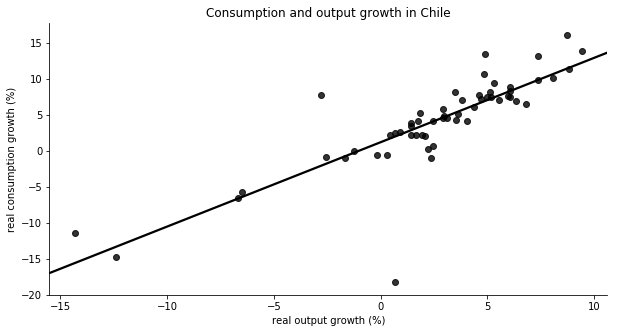

In [7]:
fig, my_ax = plt.subplots(figsize=(10,5)) 

# Theh seaborn regplot command. This is not called on an axis object (like in matplotlib)
# but we can pass it an axis so that we can do matplotlib-like tweaking.
sns.regplot(x='real_gdp', y='real_cons', data=wdi_gr['Chile'],    # the data
            ax = my_ax,                                              # an axis object
            color = 'black',                                  
            ci = 0)                                               # confidence interval, 0 supresses it

sns.despine(ax = my_ax)    # a bit easier than matplotlib                         

# Our usual labeling 
my_ax.set_title('Consumption and output growth in Chile')
my_ax.set_ylabel('real consumption growth (%)')
my_ax.set_xlabel('real output growth (%)')

plt.show()

Looking good! The default regression spec is OLS, but you can specify a more complicated model. Interestingly, you cannot recover the coefficients of the estimated regression. The person who developed seaborn is apparently [quite adamant](https://github.com/mwaskom/seaborn/issues/655) about this. 

Let's specify a 95 percent *confidence interval*. 

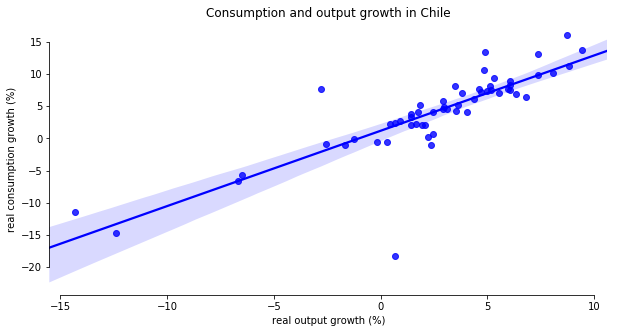

In [8]:
fig, ax = plt.subplots(figsize=(10,5)) 

# Theh seaborn regplot command. This is not called on an axis object (like in matplotlib)
# but we can pass it an axis so that we can do matplotlib-like tweaking.
sns.regplot(x='real_gdp', y='real_cons', data=wdi_gr['Chile'],    # the data
            ax = ax,                                              # an axis object
            color = 'blue',                                       # make it blue
            ci = 95)                                              # confidence interval: pass it the percent

sns.despine(ax = ax, trim=True)    # a bit easier than matplotlib
                                   # trim limits the axis to the data (very Tufte-esque)

# Our usual labeling 
ax.set_title('Consumption and output growth in Chile')
ax.set_ylabel('real consumption growth (%)')
ax.set_xlabel('real output growth (%)')

plt.show()

### sns.jointplot( )
`jointplot( )` adds the marginal distributions of the plotted variables to the axis of a regplot. 

This may be useful for visualizing the marginal distributions, but **is it important that your reader see the marginal distributions? Is it telling them something important?** Potentially, but remember, just because you can do something, doesn't mean you always should. 

<class 'seaborn.axisgrid.JointGrid'>


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


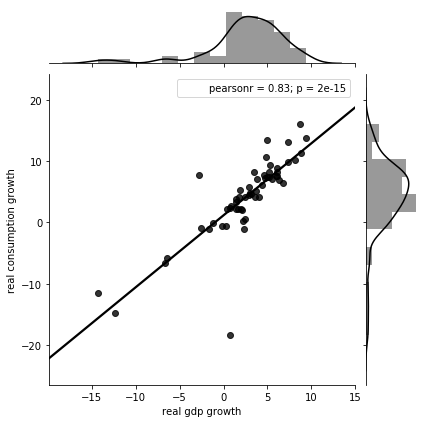

In [9]:
# rather than call plt.subplots, let seaborn create the fig and axes.
# h is the axis-like object
h = sns.jointplot(x='real_gdp', y='real_cons', kind='reg', data=wdi_gr['Chile'],
             ci=0, color = 'black')                                              # it still have regplot options, like ci

h.set_axis_labels('real gdp growth', 'real consumption growth')

# what is h?
print(type(h))

plt.show()

Notice that I did not start my figures by creating fig and axes objects. Instead, I let seaborn create the fig and axes for me. The return from `sns.jointplot()` is a JointGrid object created by seaborn. This is a more complicated figure, so it needs more complicated axes ojects. 


## Practice
The OECD has a project studying [broadband internet coverage](http://www.oecd.org/sti/broadband/broadband-statistics/) across countries. It tracks data on numbers of subscribers, speed, and prices. 

1. Load 'broadband_size.xlsx'. It contains data on broadband accounts per 100 people, GDP per capita, and population (in thousands) for several countries. Are all your variables okay? 
2. Give the columns some reasonable names. 


In [10]:
broad = pd.read_excel('broadband_size.xlsx', thousands = ',')
broad.columns = ['cty', 'broad_pen', 'gdp_cap', 'pop']
broad.head()

,cty,broad_pen,gdp_cap,pop
0,Australia,31.796,50588.149,24451
1,Austria,28.543,52467.527,8735
2,Belgium,38.588,47941.661,11429
3,Canada,37.847,46704.892,36624
4,Chile,16.515,24012.915,18055


3. Create a regplot with broadband penetration on the y axis and GDP  per capita on the x axis. Add the 95 percent confidence interval. Make it look nice. 

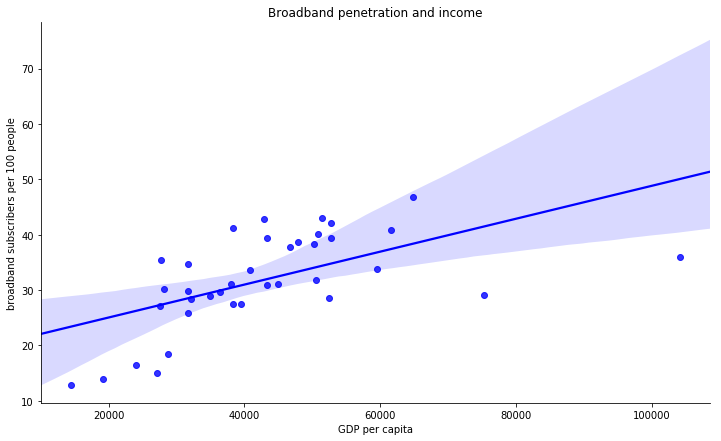

In [11]:
fig, ax = plt.subplots(figsize=(12,7)) 

# Theh seaborn regplot command. This is not called on an axis object (like in matplotlib)
# but we can pass it an axis so that we can do matplotlib-like tweaking.
sns.regplot(x='gdp_cap', y='broad_pen', data=broad,    # the data
            ax = ax,                                              # an axis object
            color = 'blue',                                       # make it blue
            ci = 95)                                              # confidence interval: pass it the percent

sns.despine(ax = ax)    # a bit easier than matplotlib


# Our usual labeling 
ax.set_title('Broadband penetration and income')
ax.set_ylabel('broadband subscribers per 100 people')
ax.set_xlabel('GDP per capita')

plt.show()

4. The relationship doesn't look very linear to me. Replot your solution from 3. but try adding the `logx=True` option to regplot to regress y = log(x). As always, consult the [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html) if you need help.

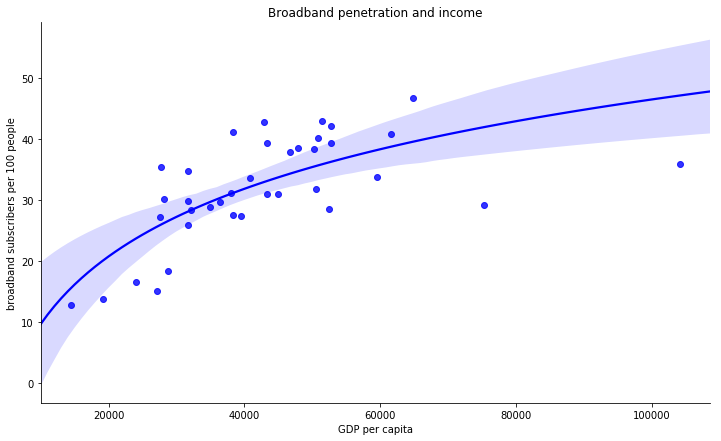

In [12]:
fig, ax = plt.subplots(figsize=(12,7)) 

# Theh seaborn regplot command. This is not called on an axis object (like in matplotlib)
# but we can pass it an axis so that we can do matplotlib-like tweaking.
sns.regplot(x='gdp_cap', y='broad_pen', data=broad,    # the data
            ax = ax,                                              # an axis object
            color = 'blue',                                       # make it blue
            ci = 95,                                              # confidence interval: pass it the percent
            logx = True)                                          # fit the line to y = log(x)

sns.despine(ax = ax)    # a bit easier than matplotlib
                 

# Our usual labeling 
ax.set_title('Broadband penetration and income')
ax.set_ylabel('broadband subscribers per 100 people')
ax.set_xlabel('GDP per capita')

plt.show()

### Bubble plot (and passing keywords)
A bubble plot is a scatter plot in which the size of the data markers (usually a circle) varies with a third variable. 

We can actually make these plots in matplotlib. The syntax is 
```python
ax.plot(x, y, s) 
```
where `s` is the variable corresponding to marker size. Since seaborn is built on top of matplotlib, we can pass *scatter keyword arguments* to `regplot( )` and these get passed through to the underlying scatter. 

The syntax for the option is `scatter_kws={'s': data_var}`. This sets the `s` argument of scatter to `data_var`. 

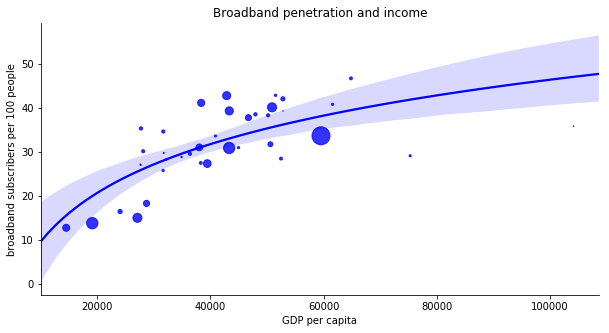

In [13]:
fig, ax = plt.subplots(figsize=(10,5)) 

# Theh seaborn regplot command. This is not called on an axis object (like in matplotlib)
# but we can pass it an axis so that we can do matplotlib-like tweaking.
sns.regplot(x='gdp_cap', y='broad_pen', data=broad,    # the data
            ax = ax,                                   # an axis object
            scatter_kws={'s': broad['pop']/1000},      # make the marker proportional to population            
            color = 'blue',                            # make it blue
            ci = 95,                                   # confidence interval: pass it the percent
            logx = True)                               # semi-log regression
                                                          

sns.despine(ax = ax)    # a bit easier than matplotlib
                                   

# Our usual labeling 
ax.set_title('Broadband penetration and income')
ax.set_ylabel('broadband subscribers per 100 people')
ax.set_xlabel('GDP per capita')
plt.show()

Another example of the scatter_kws useage is to customize the scatter colors and alpha.

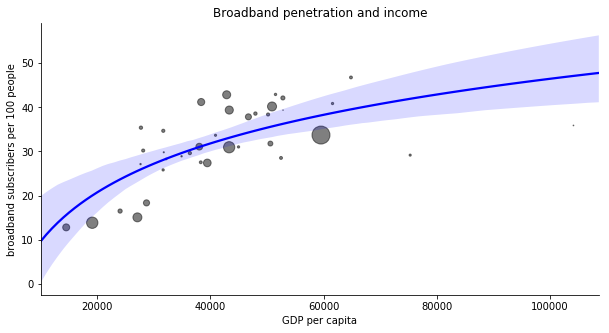

In [14]:
fig, ax = plt.subplots(figsize=(10,5)) 

# To keep the call to regplot from getting out of control, I define the scatter keywords dict here.
my_kws={'s': broad['pop']/1000, 'alpha':0.5, 'color':'black'}

# The seaborn regplot command. This is not called on an axis object (like in matplotlib)
# but we can pass it an axis so that we can do matplotlib-like tweaking.
sns.regplot(x='gdp_cap', y='broad_pen', data=broad,    # the data
            ax = ax,                                   # an axis object
            scatter_kws = my_kws,                      # pass parameters to scatter
            color = 'blue',                            # make it blue
            ci = 95,                                   # confidence interval: pass it the percent
            logx = True)                               # semi-log regression
                                                          

sns.despine(ax = ax)    # a bit easier than matplotlib
                                   

# Our usual labeling 
ax.set_title('Broadband penetration and income')
ax.set_ylabel('broadband subscribers per 100 people')
ax.set_xlabel('GDP per capita')
plt.show()

## sns.barplot( )
We have plotted some grouped bar plots, for example, when we plotted average wages for males and females. If you recall, it took a lot of fussing around to get the bars arranged. Seaborn provides an easier interface to this kind of plot. 

Back to the wdi data. Let's plot the average output and consumption growth rates by country. First, we compute the means. I am using a `gropuby( )` call with country as the grouping variable. I need to do some reshaping along the way.

In [15]:
# unstack the country variable. This yields a multiIndex on the rows.
wdi_gr = wdi_gr.stack(level=0)
wdi_gr.head()



Series Name         real_cons  real_gdp
     Country Name                      
1961 Chile              5.741     2.931
     France               NaN     4.104
     Japan                NaN     9.161
     United States        NaN     0.618
1962 Chile              4.085     1.745

In [16]:
# I group by the country, which is the inner index, and call the mean. 
wdi_means = wdi_gr.groupby(level=1).mean()
wdi_means

Series Name,real_cons,real_gdp
Country Name,,
Chile,4.162,2.545
France,2.240,2.121
Japan,2.455,3.140
United States,3.002,2.034


The DataFrame returned by groupby has the country names in the index and is 'wide'. We want these data **long** for the plot. 
1. Pull country name out of the index
2. melt() the dataframe

In [17]:
wdi_means = wdi_means.reset_index()
wdi_means = wdi_means.melt(id_vars='Country Name')
wdi_means

,Country Name,Series Name,value
0,Chile,real_cons,4.162
1,France,real_cons,2.240
2,Japan,real_cons,2.455
3,United States,real_cons,3.002
4,Chile,real_gdp,2.545
5,France,real_gdp,2.121
6,Japan,real_gdp,3.140
7,United States,real_gdp,2.034


Okay, let's plot. We specify three columns of data
1. The variable to group along the x-axis. In our case, this is the country. **(x)**
2. The column with the variable to plot. In our case, the value column. **(y)**
3. The column with the names of the variables we are plotting. In this case, the series name. **(hue)**

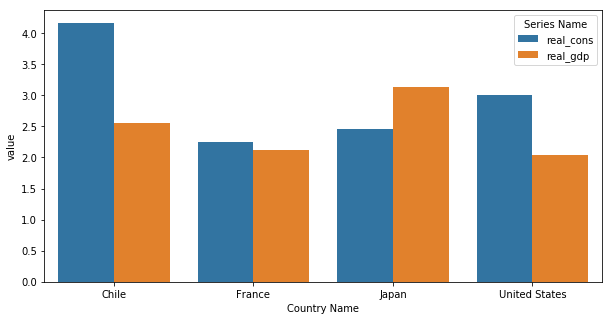

In [18]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(x='Country Name', y = 'value', hue='Series Name', data=wdi_means, ax = ax)

plt.show()

The bars are lined up the way we want them, but this is pretty ugly (unless you are a Broncos fan). Let's fix up the legend, kill the unneeded spines and tweak the colors. More details after the code. 

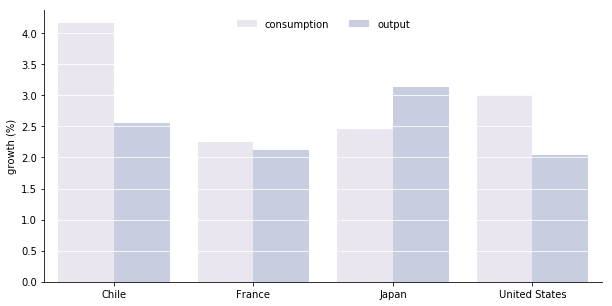

In [19]:
fig, ax = plt.subplots(figsize=(10,5))

# seaborn's barplot, which handles multi-bar plots better than matplot lib, although the data has
# to be set up properly --- in long form
sns.barplot(x='Country Name', y = 'value', hue='Series Name', data=wdi_means,
           ax = ax, palette = sns.color_palette('PuBu'))                      # I'm spec'ing a purple-blue 
                                                                              # color palette. Details below.  
sns.despine()  # Easier than the matplotlib way.

ax.set_xlabel('')                        # I am trusting my reader to know that the x-axis are countries
ax.set_ylabel('growth (%)')

# Clean up the legend. Details below. 
ax.legend().set_title('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['consumption', 'output'], frameon=False, ncol=2, loc='upper center')

ax.grid(axis='y', color='white')

plt.show()

### legends
Since seaborn is built on top of matplotlib, legends work the same for both packages (in most cases). We haven't spent much time tweaking legends, but sometimes it's necessary.

A legend is made up of *handles* and *labels*. Think of handles as pointers to each line/bar/series that is plotted (they are responsible for the little bars of color) and labels as the label associated with each handle. 

First, we retrieve the handles and labels from the existing legend. 
```python
handles, labels = ax.get_legend_handles_labels()
```
Note that we reference an axes object to retrieve the associated legend data. The labels are just a list of strings. The list elements default to the column names, but our column names are not great as legend descriptions, so we rebuild the legend by passing handles and labels to the `legend( )` method.
```python
ax.legend(handles, ['consumption', 'output'])
```
Much better. 

A few more options at work in the code: 
1. I used the `frameon=False` to turn off the box around the legend. 
2. I used the `ncol=2` so that the legend would have two columns (and thus one row). 
3. I used the `loc='upper center'` to specify where the legend should go. If I do not spec this parameter, matplotlib puts it somewhere in the empty space. Takes combinations of (upper, lower) and (left, center, right).
4. The line `ax.legend().set_title('')` eliminated the legend title. 


### color palettes
A palette is a sequence of colors that seaborn (or matplotlib) uses when creating plots. There are lots of palettes to choose from, and you can create your own custom palette, too. This [post](https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/) from Chris Albon documents several of them.  

Rather than set the palatte each time you plot, you can set the color palatte once at the begining of your code and the palatte will be applied to all of your figures in a unifrom way, which will result in uniform coloring. The code is
```python
sns.set_palette(pal)
```
where `pal` is a palatte. 

## Practice
Let's redo exam 1, question 3 (again!). The file 'CPS_March_2016.csv' has the data. 

To save time, the code below does the subsetting (full time workers, wage between 5 and 200 dollars an hour) and cleans a few things up. Take a look and make sure you understand what everything is doing. 

In [20]:
# Import data:
cps = pd.read_csv("CPS_March_2016.csv",na_values = ".")

# Keep individuals who worked full time last year and with wages between $5 and $200.
cps = cps[(cps['fulltimely'] == 1) & (cps['hrwage'] >= 5) & (cps['hrwage'] <= 200)]

# Recode the male/female variable
cps['female'] = cps['female'].replace({0:'male', 1:'female'})
cps.rename(columns = {'female':'gender'}, inplace=True)

cps.head()

,hrwage,educ,gender,fulltimely
0,20.962,Some college,male,1.0
1,20.192,HS diploma/GED,female,1.0
6,14.286,HS diploma/GED,female,1.0
10,18.269,Some college,female,1.0
12,59.524,Graduate degree,male,1.0


1. Compute the average wage by level of education for females and males using the `groupby( )` and `mean( )` methods. You should have one DataFrame when you are finished. Call the DataFrame cps_means.

In [21]:
cps_means = cps.groupby(['gender', 'educ'])['hrwage'].mean()
cps_means

gender  educ           
female  College degree     27.196
        Graduate degree    35.492
        HS diploma/GED     16.075
        Less than HS       12.433
        Some college       19.171
male    College degree     36.320
        Graduate degree    47.227
        HS diploma/GED     20.991
        Less than HS       16.184
        Some college       24.479
Name: hrwage, dtype: float64

2. Arrange the DataFrame returned by `groupby()` so that it is long---like we did for the growth rates data above. 

In [22]:
cps_means = cps_means.reset_index()
cps_means

,gender,educ,hrwage
0,female,College degree,27.196
1,female,Graduate degree,35.492
2,female,HS diploma/GED,16.075
3,female,Less than HS,12.433
4,female,Some college,19.171
5,male,College degree,36.320
6,male,Graduate degree,47.227
7,male,HS diploma/GED,20.991
8,male,Less than HS,16.184
9,male,Some college,24.479


3. Plot the average wage for men and for women by education level on a `sns.barplot( )`. The x-axis should be the education level and there should be two bars for each education level. One for men and one for women. 
4. Fix up the legend.
5. Use the `order` parameter [(docs)](https://seaborn.pydata.org/generated/seaborn.barplot.html) to order the bars from least education to most.
6. Try a different color palatte than we have already used. 

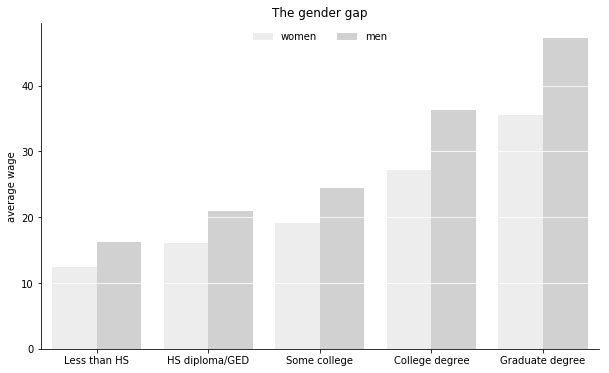

In [23]:
fig, ax = plt.subplots(figsize=(10,6))

my_order = ['Less than HS', 'HS diploma/GED', 'Some college', 'College degree', 'Graduate degree']

# seaborn's barplot, which handles multi-bar plots better than matplot lib, although the data has
# to be set up properly --- in long form
sns.barplot(x='educ', y = 'hrwage', hue='gender', data=cps_means,
           ax = ax, palette = sns.color_palette('Greys'),                 # I'm spec'ing a grey palatte 
           order = my_order)                                              # The order of the x-axis                      
                                                                                
sns.despine()  # Easier than the matplotlib way.

ax.set_xlabel('')                        # I am trusting my reader to know that the x-axis are education levels
ax.set_ylabel('average wage')
ax.set_title('The gender gap')

# Clean up the legend. Details below. 
ax.legend().set_title('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['women', 'men'], frameon=False, ncol=2, loc='upper center')

ax.grid(axis='y', color='white')

plt.show()